In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ckdisease/kidney_disease.csv


In [3]:
df=pd.read_csv('/kaggle/input/ckdisease/kidney_disease.csv')

In [4]:
df.shape

(400, 26)

In [5]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
object_cols = df.select_dtypes(include=['object']).columns

# Count missing values
missing_numerical = df[numerical_cols].isnull().sum()
missing_object = df[object_cols].isnull().sum()

# Display missing values for each type
print("Missing values in numerical columns:\n", missing_numerical[missing_numerical > 0])
print("\nMissing values in object columns:\n", missing_object[missing_object > 0])

Missing values in numerical columns:
 age      9
bp      12
sg      47
al      46
su      49
bgr     44
bu      19
sc      17
sod     87
pot     88
hemo    52
dtype: int64

Missing values in object columns:
 rbc      152
pc        65
pcc        4
ba         4
pcv       70
wc       105
rc       130
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64


In [8]:
# Fill missing values in numerical columns with mean
df[numerical_cols] = df[numerical_cols].apply(lambda col: col.fillna(col.mean()))

# Verify if missing values are filled
print(df[numerical_cols].isnull().sum())


id      0
age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
dtype: int64


In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Identify categorical columns with missing values
categorical_cols = df.select_dtypes(include=['object']).columns
missing_cols = [col for col in categorical_cols if df[col].isnull().sum() > 0]

# Function to fill missing categorical values using RandomForest
def fill_missing_categorical(df, column):
    # Separate rows with and without missing values
    train_data = df[df[column].notnull()]
    test_data = df[df[column].isnull()]
    
    # Select features for training and prediction
    features = df.drop(columns=missing_cols + [column])  # Drop columns with missing values and target column
    features = pd.get_dummies(features, drop_first=True)  # One-hot encode features
    
    X = features.loc[train_data.index]
    y = train_data[column]
    
    X_test = features.loc[test_data.index]
    
    # Train RandomForest
    model = RandomForestClassifier()
    model.fit(X, y)
    
    # Predict and fill missing values
    df.loc[test_data.index, column] = model.predict(X_test)
    return df

# Apply the function to each column with missing values
for col in missing_cols:
    df = fill_missing_categorical(df, col)

# Check if all missing values are filled
print(df.isnull().sum())


id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


In [10]:
duplicates = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicates)

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Verify if duplicates are removed
print("Number of rows after removing duplicates:", len(df_cleaned))

Duplicate Rows:
Empty DataFrame
Columns: [id, age, bp, sg, al, su, rbc, pc, pcc, ba, bgr, bu, sc, sod, pot, hemo, pcv, wc, rc, htn, dm, cad, appet, pe, ane, classification]
Index: []

[0 rows x 26 columns]
Number of rows after removing duplicates: 400


In [11]:
# Convert 'age' to integer
df['age'] = df['age'].astype(int)

# Convert categorical object columns to category type
categorical_columns = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Convert 'pcv' and 'wc' to integer
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce').astype('Int64')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce').astype('Int64')

# Convert 'rc' to float
df['rc'] = pd.to_numeric(df['rc'], errors='coerce').astype(float)

# Display the updated data types
print(df.dtypes)


id                   int64
age                  int64
bp                 float64
sg                 float64
al                 float64
su                 float64
rbc               category
pc                category
pcc               category
ba                category
bgr                float64
bu                 float64
sc                 float64
sod                float64
pot                float64
hemo               float64
pcv                  Int64
wc                   Int64
rc                 float64
htn               category
dm                category
cad               category
appet             category
pe                category
ane               category
classification    category
dtype: object


In [12]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              400 non-null    int64   
 1   age             400 non-null    int64   
 2   bp              400 non-null    float64 
 3   sg              400 non-null    float64 
 4   al              400 non-null    float64 
 5   su              400 non-null    float64 
 6   rbc             400 non-null    category
 7   pc              400 non-null    category
 8   pcc             400 non-null    category
 9   ba              400 non-null    category
 10  bgr             400 non-null    float64 
 11  bu              400 non-null    float64 
 12  sc              400 non-null    float64 
 13  sod             400 non-null    float64 
 14  pot             400 non-null    float64 
 15  hemo            400 non-null    float64 
 16  pcv             399 non-null    Int64   
 17  wc              

In [13]:
numerical = df.select_dtypes(include=['float64', 'int64'])

# Function to remove outliers using IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers
df_cleaned = remove_outliers(df, numerical.columns)

# Save the cleaned dataset
df_cleaned.to_csv('cleaned_dataset.csv', index=False)




In [14]:
numerical = df.select_dtypes(include=['float64', 'int64'])

def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap values
        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
        
    return df

# Apply capping
df_capped = cap_outliers(df, numerical.columns)

# Save the cleaned dataset
df_capped.to_csv('capped_dataset.csv', index=False)

print("Outliers capped successfully!")


Outliers capped successfully!


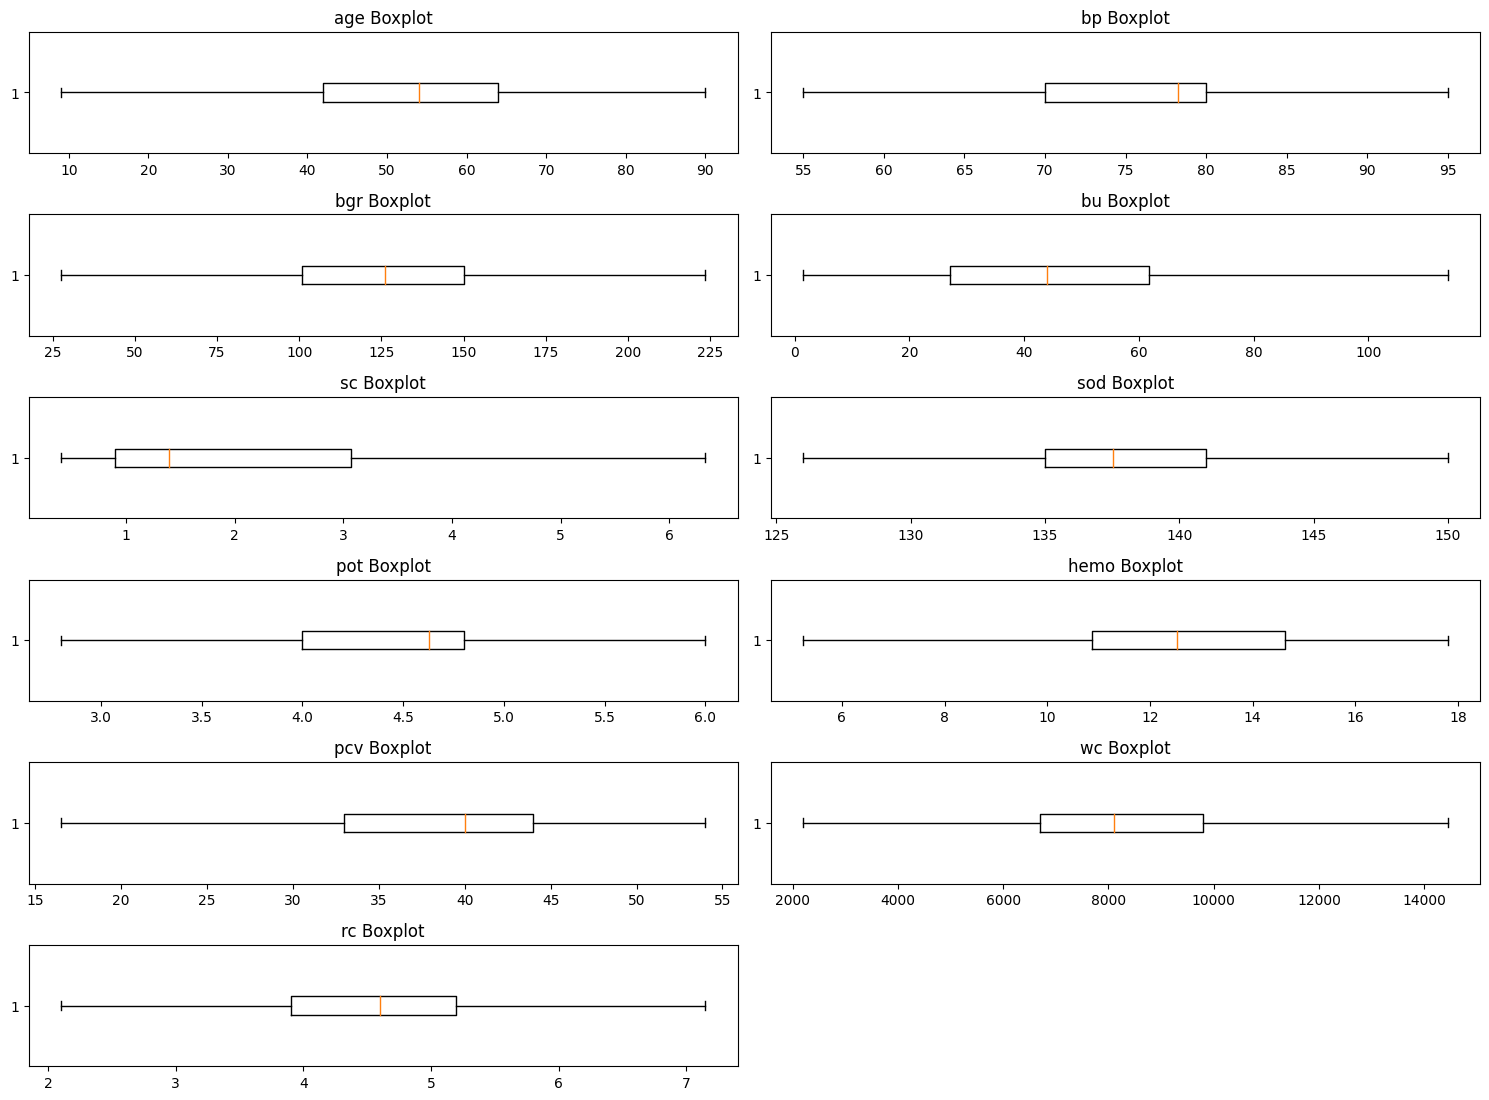

In [15]:
import pandas as pd
import matplotlib.pyplot as plt



# List of numerical columns to plot
numerical_cols = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

# Plot boxplots for each numerical column
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 2, i)
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns 
# List of numerical columns for kidney disorder analysis

numerical_cols = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

# Set up the plotting environment
plt.figure(figsize=(20, 30))

# Plot histograms and boxplots for each numerical column
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 2, 2*i+1)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'{col} - Distribution')

    plt.subplot(len(numerical_cols), 2, 2*i+2)
    sns.boxplot(x=df[col], color='green')
    plt.title(f'{col} - Boxplot')

plt.tight_layout()
plt.show()



# Correlation heatmap
plt.figure(figsize=(15, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Step 1: Clean Categorical Data
def clean_categorical_data(df, categorical_cols):
    for col in categorical_cols:
        # Remove leading/trailing spaces
        df[col] = df[col].str.strip()
        # Convert to lowercase for consistency
        df[col] = df[col].str.lower()
        # Replace unknown or missing-like values
        df[col] = df[col].replace(['?', 'unknown', 'n/a', 'na', '-'], np.nan)
    return df

df = clean_categorical_data(df, categorical_cols)

# Step 2: Handle Rare Categories
def handle_rare_categories(df, categorical_cols, threshold=0.05):
    for col in categorical_cols:
        freq = df[col].value_counts(normalize=True)  # Frequency of each category
        rare_labels = freq[freq < threshold].index  # Identify rare categories
        df[col] = df[col].apply(lambda x: 'other' if x in rare_labels else x)  # Group rare categories
    return df

df = handle_rare_categories(df, categorical_cols, threshold=0.05)

# Save cleaned dataset
df.to_csv('cleaned_medical_dataset.csv', index=False)

print("Categorical data cleaned and rare categories handled successfully!")

In [ ]:
import pandas as pd

def clean_categorical_columns(df, categorical_columns):
    for col in categorical_columns:
        # Remove extra spaces
        df[col] = df[col].str.strip()

        # Handle inconsistent and unknown values
        df[col] = df[col].replace({
            'ckd\x92': 'ckd',
            'yes': 'yes',
            'no': 'no',
            'yes\x92': 'yes',
            'no\x92': 'no'
        })

        # Remove unknown values
        df = df[df[col] != 'unknown']

        # Group rare values
        value_counts = df[col].value_counts()
        rare_values = value_counts[value_counts < 5].index
        df[col] = df[col].apply(lambda x: 'other' if x in rare_values else x)

    return df

# Example usage:
categorical_columns = ['dm', 'cad', 'classification', 'htn', 'ane', 'pe', 'appet', 'ba', 'pcc', 'pc', 'rbc']
df_cleaned = clean_categorical_columns(df, categorical_columns)

print("Categorical columns cleaned successfully!")


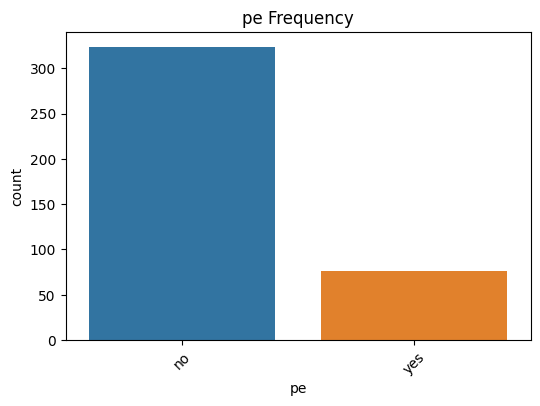

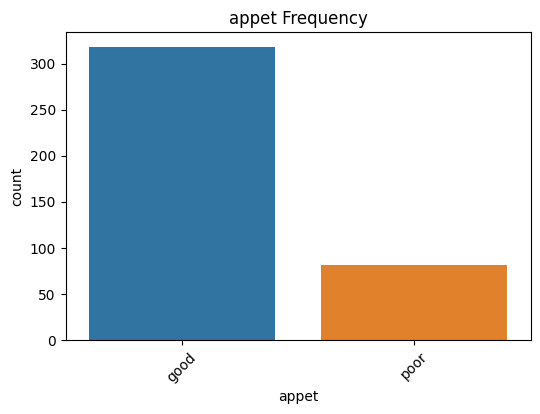

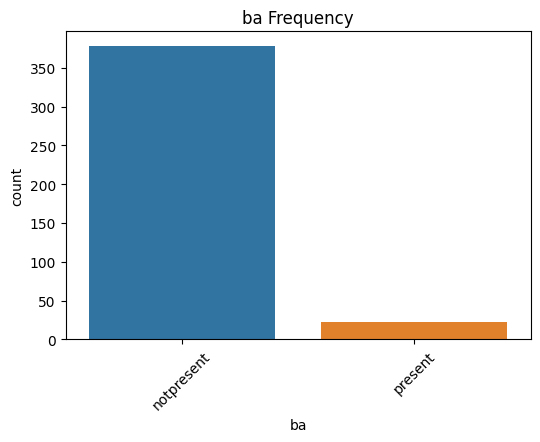

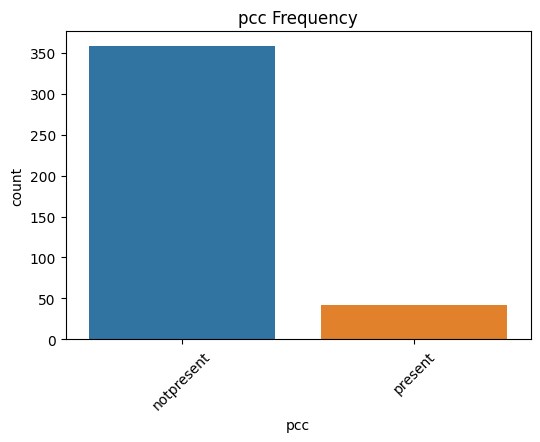

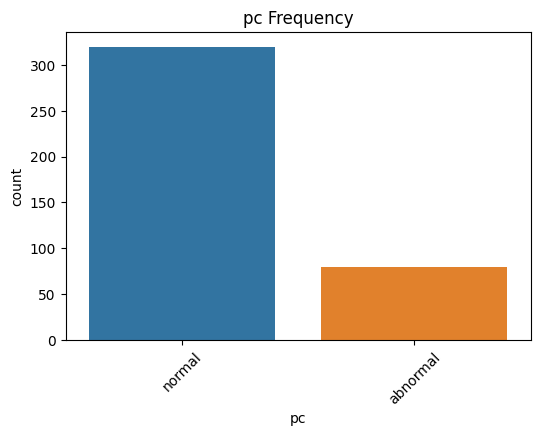

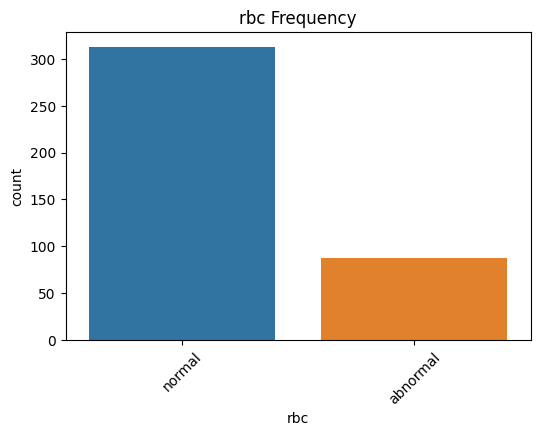

In [19]:

import seaborn as sns
import matplotlib.pyplot as plt

# Plotting cleaned categorical columns
def plot_categorical_columns(df, categorical_columns):
    for col in categorical_columns:
        plt.figure(figsize=(6,4))
        sns.countplot(data=df, x=col)
        plt.title(f'{col} Frequency')
        plt.xticks(rotation=45)
        plt.show()

categorical_columns = ['dm', 'cad', 'classification', 'htn', 'ane', 'pe', 'appet', 'ba', 'pcc', 'pc', 'rbc']
plot_categorical_columns(df_cleaned, categorical_columns)


In [20]:
df = df.drop('id', axis=1)


In [21]:
df['classification'] = df['classification'].str.strip()  # Removes spaces & tab characters
print(df['classification'].unique())  # Check again


['ckd' 'notckd']


Unique categories before correction: ['no', 'yes', '\tno']
Categories (3, object): ['\tno', 'no', 'yes']
Unique categories after correction: ['no' 'yes']


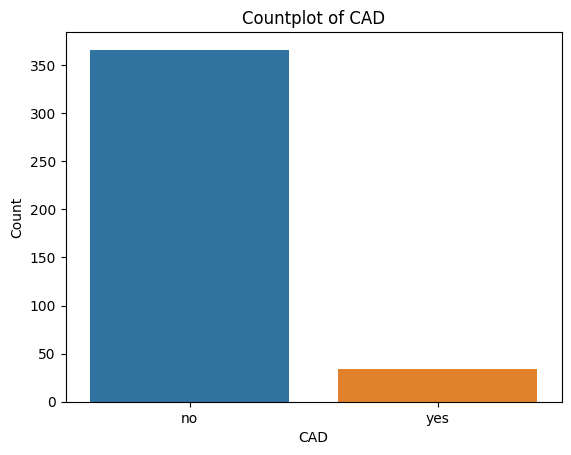

In [22]:
print("Unique categories before correction:", df['cad'].unique())

# Correct the data by stripping any leading/trailing whitespace or tabs
df['cad'] = df['cad'].str.strip()

# Verify the correction
print("Unique categories after correction:", df['cad'].unique())

# Plot the corrected data
sns.countplot(x='cad', data=df)
plt.xlabel('CAD')
plt.ylabel('Count')
plt.title('Countplot of CAD')
plt.show()

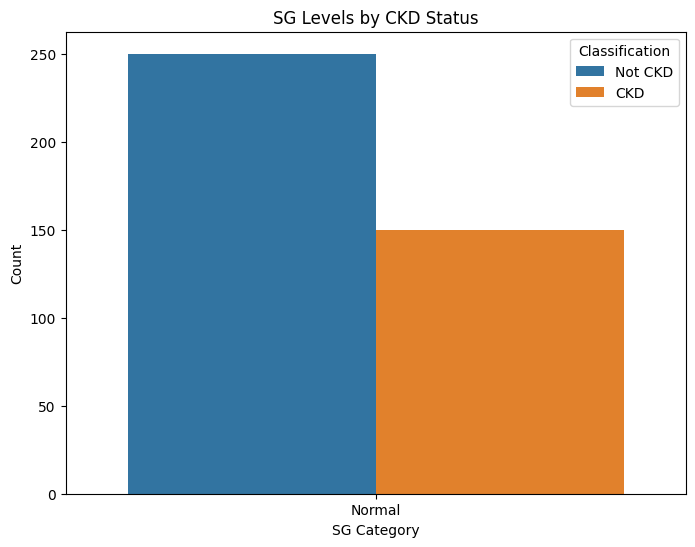

  SG_category classification  Count
0      Normal            ckd    250
1      Normal         notckd    150


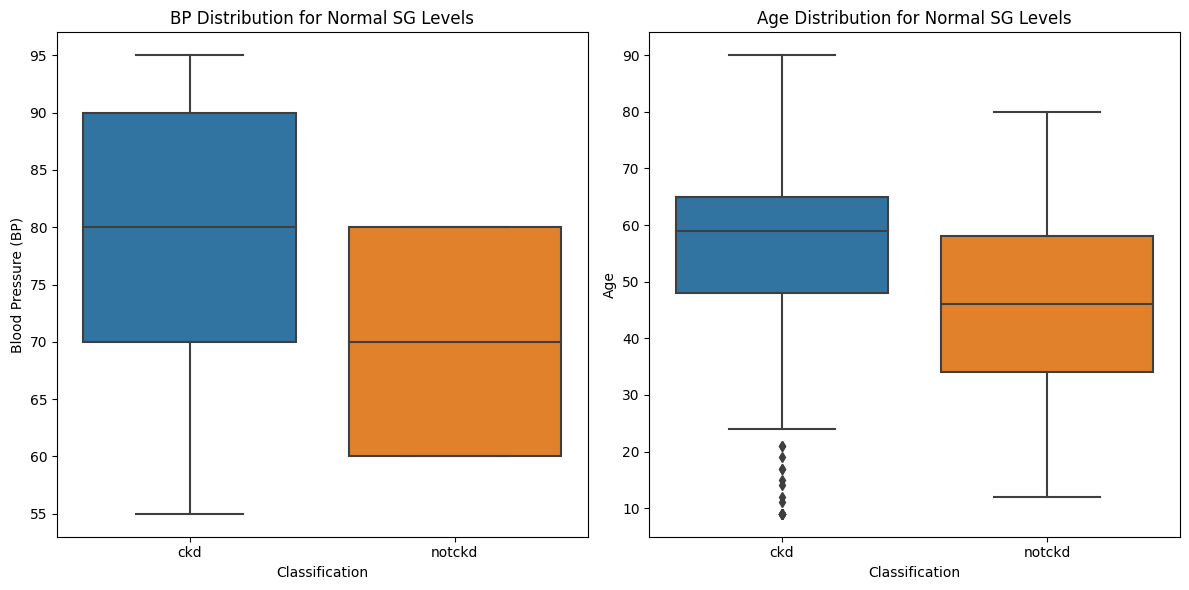

There are no 'Abnormal' SG levels in the dataset.


In [23]:
# Adjust the categorization based on the SG range
df['SG_category'] = df['sg'].apply(lambda x: 'Normal' if 1.005 <= x <= 1.035 else 'Abnormal')  # Adjusted range

# Check the distribution of SG levels (Normal vs Abnormal)
plt.figure(figsize=(8, 6))#you give me the code for visualization 
sns.countplot(data=df, x='SG_category', hue='classification')
plt.title('SG Levels by CKD Status')
plt.xlabel('SG Category')
plt.ylabel('Count')
plt.legend(title='Classification', loc='upper right', labels=['Not CKD', 'CKD'])
plt.show()

# Grouping by SG Category and CKD status to get the count
sg_ckd_group = df.groupby(['SG_category', 'classification']).size().reset_index(name='Count')
print(sg_ckd_group)

# Now show the BP and Age distribution for Normal and Abnormal SG levels
plt.figure(figsize=(12, 6))

# BP and Age distribution for Normal SG
plt.subplot(1, 2, 1)
sns.boxplot(data=df[df['SG_category'] == 'Normal'], x='classification', y='bp')
plt.title('BP Distribution for Normal SG Levels')
plt.xlabel('Classification')
plt.ylabel('Blood Pressure (BP)')

plt.subplot(1, 2, 2)
sns.boxplot(data=df[df['SG_category'] == 'Normal'], x='classification', y='age')
plt.title('Age Distribution for Normal SG Levels')
plt.xlabel('Classification')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

# Check if there are any "Abnormal" SG values
if df[df['SG_category'] == 'Abnormal'].shape[0] > 0:
    # For Abnormal SG levels
    plt.figure(figsize=(12, 6))

    # BP distribution for Abnormal SG
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df[df['SG_category'] == 'Abnormal'], x='classification', y='bp')
    plt.title('BP Distribution for Abnormal SG Levels')
    plt.xlabel('Classification')
    plt.ylabel('Blood Pressure (BP)')

    # Age distribution for Abnormal SG
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df[df['SG_category'] == 'Abnormal'], x='classification', y='age')
    plt.title('Age Distribution for Abnormal SG Levels')
    plt.xlabel('Classification')
    plt.ylabel('Age')

    plt.tight_layout()
    plt.show()
else:
    # Show a message indicating no abnormal SG levels in the dataset
    print("There are no 'Abnormal' SG levels in the dataset.")


In [24]:
# Define the range
lower_bound = 1.005
upper_bound = 1.035

# Calculate the midpoint between 1.005 and 1.035
midpoint = (lower_bound + upper_bound) / 2
tolerance = 0.002  # Adjust the tolerance as needed

# Count people with SG below the midpoint
below_midpoint = df[(df['sg'] >= lower_bound) & (df['sg'] < midpoint)].shape[0]

# Count people with SG above the midpoint
above_midpoint = df[(df['sg'] > midpoint) & (df['sg'] <= upper_bound)].shape[0]

# Count people with SG near the midpoint
near_midpoint = df[(df['sg'] >= midpoint - tolerance) & (df['sg'] <= midpoint + tolerance)].shape[0]

# Count people with SG between 1.005 and 1.035
between_range = df[(df['sg'] > lower_bound) & (df['sg'] < upper_bound)].shape[0]

# Display the results
print(f"People with SG between {lower_bound} and {upper_bound}: {between_range}")
print(f"People with SG below the midpoint ({midpoint}): {below_midpoint}")
print(f"People with SG above the midpoint ({midpoint}): {above_midpoint}")
print(f"People with SG near the midpoint ({midpoint}): {near_midpoint}")



People with SG between 1.005 and 1.035: 400
People with SG below the midpoint (1.02): 213
People with SG above the midpoint (1.02): 81
People with SG near the midpoint (1.02): 106


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


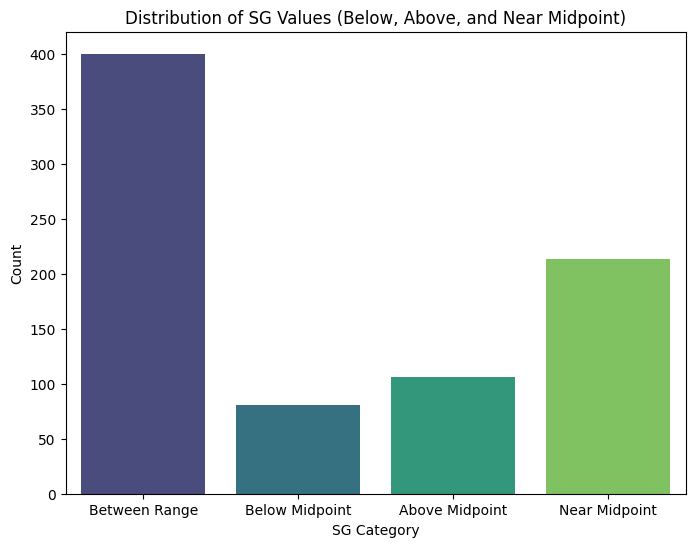

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with the results for visualization
labels = ['Between Range','Below Midpoint', 'Above Midpoint', 'Near Midpoint']
counts = [between_range, above_midpoint, near_midpoint, below_midpoint]

# Create a bar plot to visualize the counts
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=counts, palette='viridis')

# Add title and labels
plt.title('Distribution of SG Values (Below, Above, and Near Midpoint)')
plt.xlabel('SG Category')
plt.ylabel('Count')

# Display the plot
plt.show()


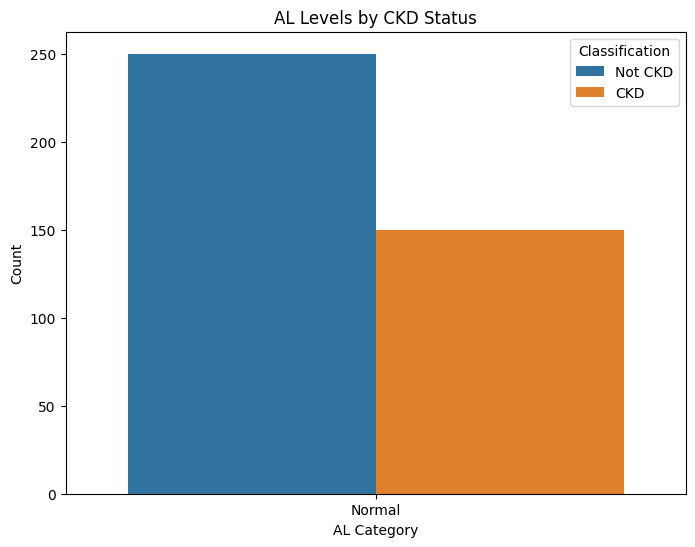

  AL_category classification  Count
0      Normal            ckd    250
1      Normal         notckd    150


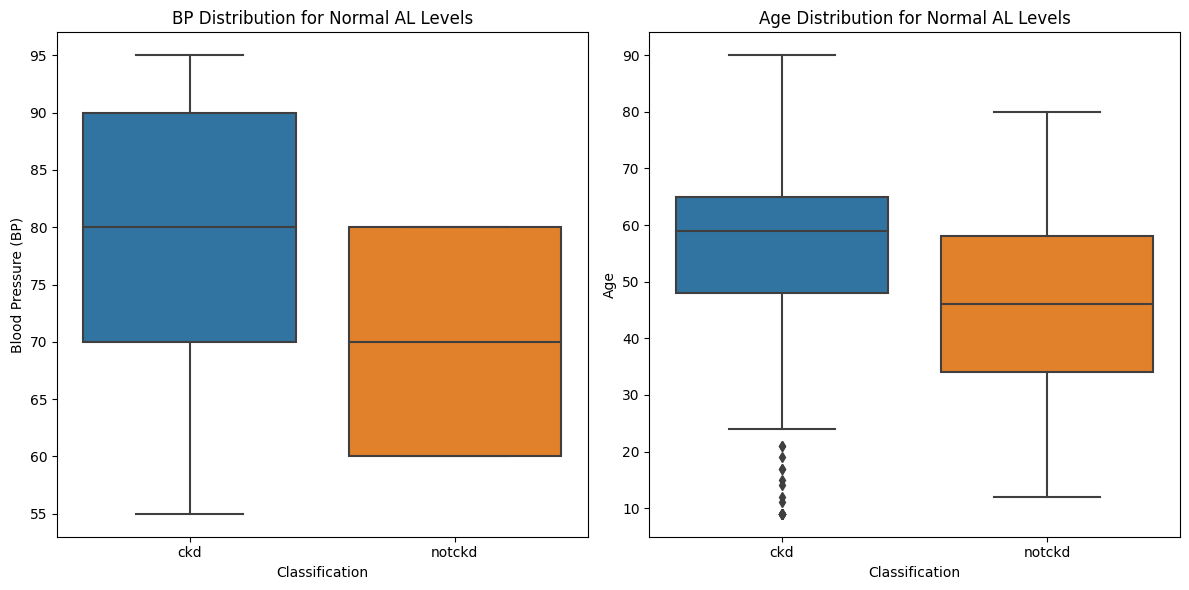

There are no 'Abnormal' AL levels in the dataset.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Categorizing AL levels
df['AL_category'] = df['al'].apply(lambda x: 'Normal' if x < 30 else 'Abnormal')

# 📌 Count of Normal vs. Abnormal AL levels
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='AL_category', hue='classification')
plt.title('AL Levels by CKD Status')
plt.xlabel('AL Category')
plt.ylabel('Count')
plt.legend(title='Classification', loc='upper right', labels=['Not CKD', 'CKD'])
plt.show()

# 📌 Grouping by AL Category and CKD status to get the count
al_ckd_group = df.groupby(['AL_category', 'classification']).size().reset_index(name='Count')
print(al_ckd_group)

# 📌 Boxplots of BP and Age for Normal and Abnormal AL levels
plt.figure(figsize=(12, 6))

# BP and Age distribution for Normal AL
plt.subplot(1, 2, 1)
sns.boxplot(data=df[df['AL_category'] == 'Normal'], x='classification', y='bp')
plt.title('BP Distribution for Normal AL Levels')
plt.xlabel('Classification')
plt.ylabel('Blood Pressure (BP)')

plt.subplot(1, 2, 2)
sns.boxplot(data=df[df['AL_category'] == 'Normal'], x='classification', y='age')
plt.title('Age Distribution for Normal AL Levels')
plt.xlabel('Classification')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

# 📌 Check if there are any "Abnormal" AL values
if df[df['AL_category'] == 'Abnormal'].shape[0] > 0:
    # For Abnormal AL levels
    plt.figure(figsize=(12, 6))

    # BP distribution for Abnormal AL
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df[df['AL_category'] == 'Abnormal'], x='classification', y='bp')
    plt.title('BP Distribution for Abnormal AL Levels')
    plt.xlabel('Classification')
    plt.ylabel('Blood Pressure (BP)')

    # Age distribution for Abnormal AL
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df[df['AL_category'] == 'Abnormal'], x='classification', y='age')
    plt.title('Age Distribution for Abnormal AL Levels')
    plt.xlabel('Classification')
    plt.ylabel('Age')

    plt.tight_layout()
    plt.show()
else:
    # Show a message indicating no abnormal AL levels in the dataset
    print("There are no 'Abnormal' AL levels in the dataset.")


Number of people with AL value < 30: 400


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


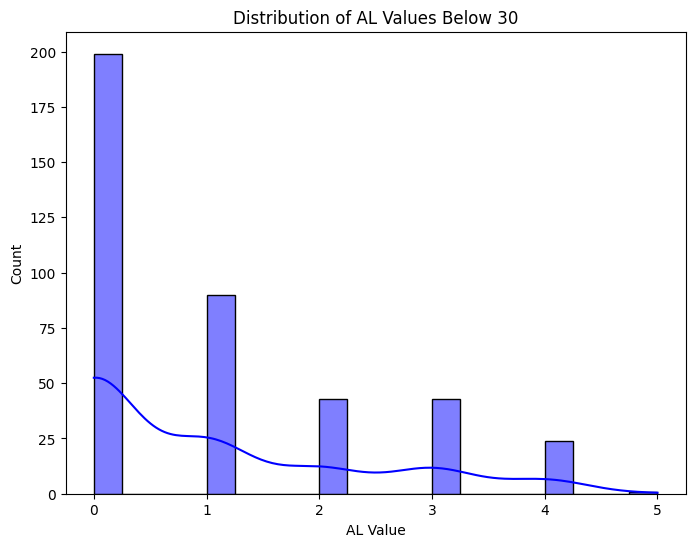

In [27]:
# Count how many people have AL values less than 30
below_30 = df[df['al'] < 30].shape[0]

# Count how many AL values are less than 30 in the dataset
print(f"Number of people with AL value < 30: {below_30}")

# Now, let's visualize how the AL values below 30 are spread
plt.figure(figsize=(8, 6))

# Histogram of AL values < 30
sns.histplot(df[df['al'] < 30]['al'], kde=True, color='blue', bins=20)

# Add title and labels
plt.title('Distribution of AL Values Below 30')
plt.xlabel('AL Value')
plt.ylabel('Count')

plt.show()


Number of people with AL value < 30: 400


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


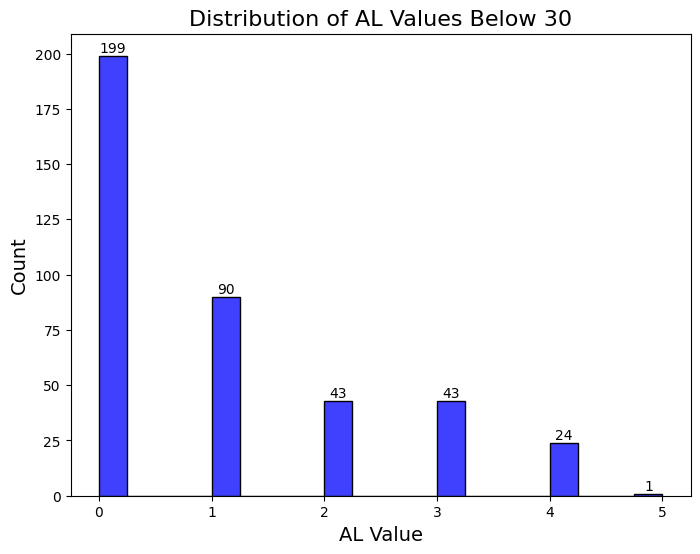

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count how many people have AL values less than 30
below_30 = df[df['al'] < 30].shape[0]

# Print the count
print(f"Number of people with AL value < 30: {below_30}")

# Set up the plot
plt.figure(figsize=(8, 6))

# Create a histogram of AL values < 30
hist = sns.histplot(df[df['al'] < 30]['al'], color='blue', bins=20, kde=False)

# Add title and labels
plt.title('Distribution of AL Values Below 30', fontsize=16)
plt.xlabel('AL Value', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add count labels on top of each bar
for p in hist.patches:
    height = p.get_height()
    if height > 0:  # Only label bars with a height greater than 0
        hist.annotate(
            f'{int(height)}',  # Display the count as an integer
            (p.get_x() + p.get_width() / 2., height),  # Position the label at the center of the bar
            ha='center',  # Center the label horizontally
            va='bottom',  # Position the label at the top of the bar
            fontsize=10,
            color='black'
        )

# Show the plot
plt.show()

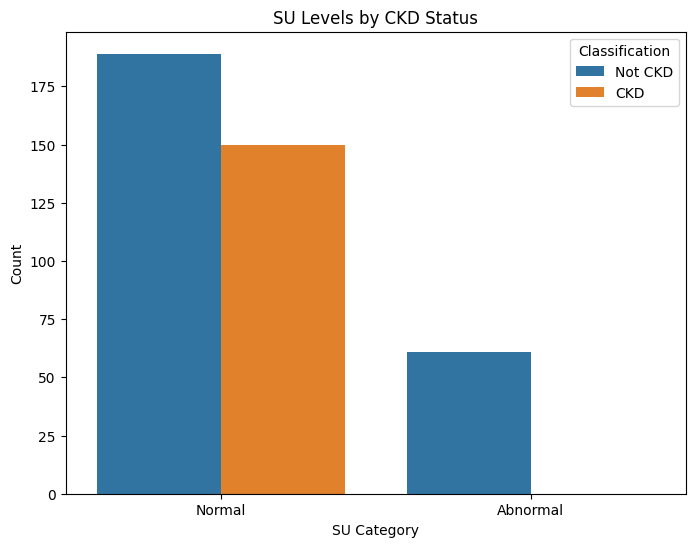

  SU_category classification  Count
0    Abnormal            ckd     61
1      Normal            ckd    189
2      Normal         notckd    150


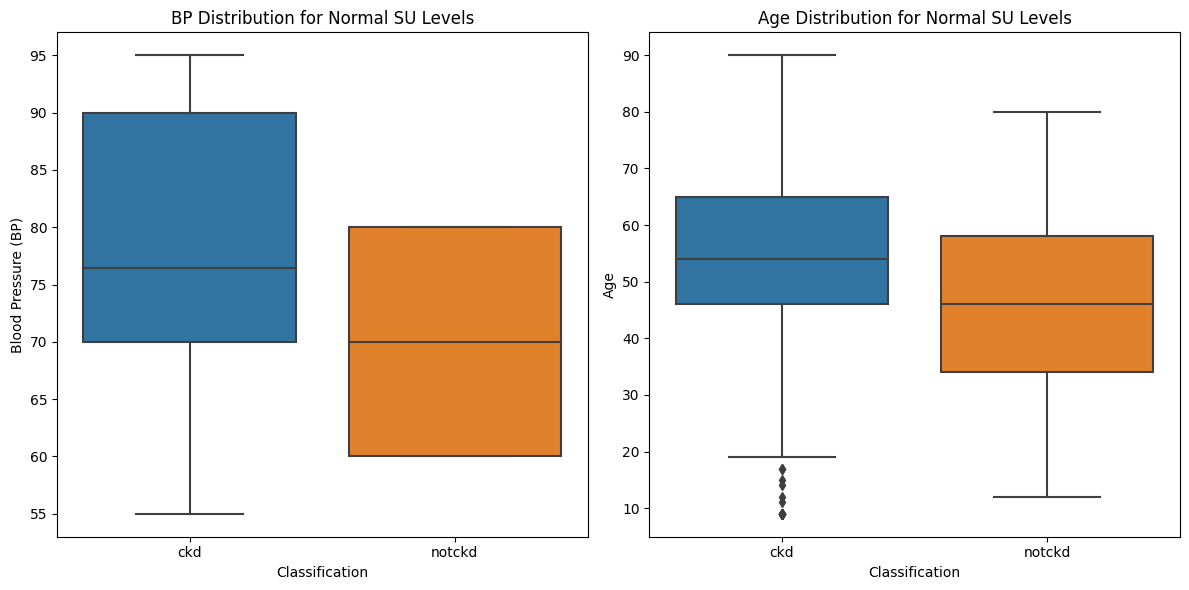

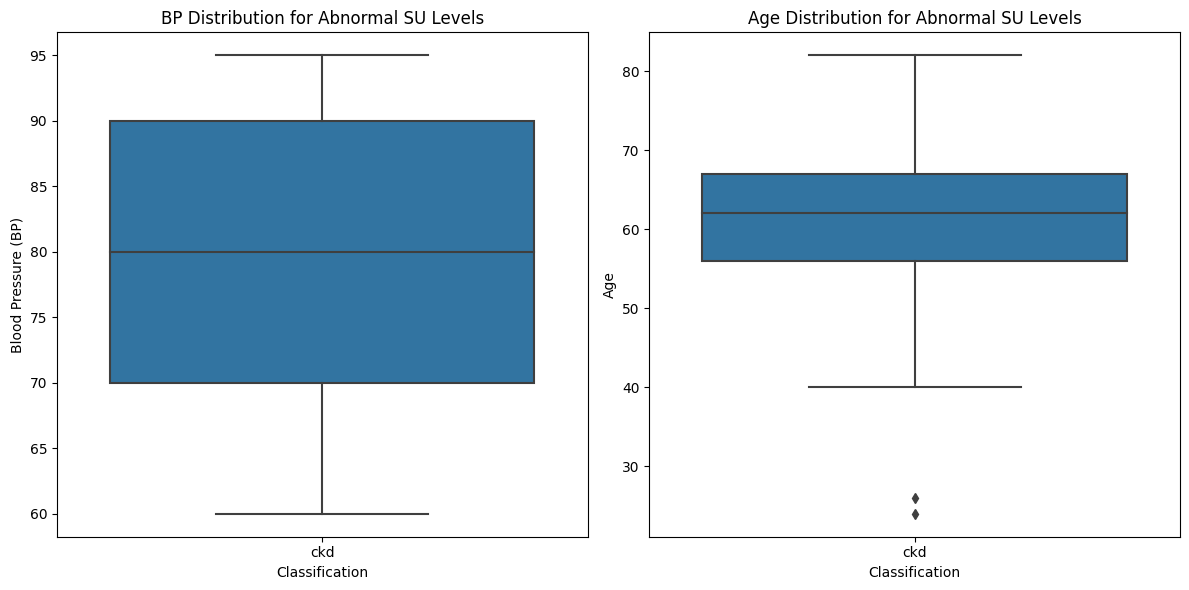

In [29]:

# Categorizing SU levels
df['SU_category'] = df['su'].apply(lambda x: 'Normal' if x <= 0.8 else 'Abnormal')

# 📌 Count of Normal vs. Abnormal SU levels
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='SU_category', hue='classification')
plt.title('SU Levels by CKD Status')
plt.xlabel('SU Category')
plt.ylabel('Count')
plt.legend(title='Classification', loc='upper right', labels=['Not CKD', 'CKD'])
plt.show()

# 📌 Grouping by SU Category and CKD status to get the count
su_ckd_group = df.groupby(['SU_category', 'classification']).size().reset_index(name='Count')
print(su_ckd_group)

# 📌 Boxplots of BP and Age for Normal and Abnormal SU levels
plt.figure(figsize=(12, 6))

# BP and Age distribution for Normal SU
plt.subplot(1, 2, 1)
sns.boxplot(data=df[df['SU_category'] == 'Normal'], x='classification', y='bp')
plt.title('BP Distribution for Normal SU Levels')
plt.xlabel('Classification')
plt.ylabel('Blood Pressure (BP)')

plt.subplot(1, 2, 2)
sns.boxplot(data=df[df['SU_category'] == 'Normal'], x='classification', y='age')
plt.title('Age Distribution for Normal SU Levels')
plt.xlabel('Classification')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

# 📌 Check if there are any "Abnormal" SU values
if df[df['SU_category'] == 'Abnormal'].shape[0] > 0:
    # For Abnormal SU levels
    plt.figure(figsize=(12, 6))

    # BP distribution for Abnormal SU
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df[df['SU_category'] == 'Abnormal'], x='classification', y='bp')
    plt.title('BP Distribution for Abnormal SU Levels')
    plt.xlabel('Classification')
    plt.ylabel('Blood Pressure (BP)')

    # Age distribution for Abnormal SU
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df[df['SU_category'] == 'Abnormal'], x='classification', y='age')
    plt.title('Age Distribution for Abnormal SU Levels')
    plt.xlabel('Classification')
    plt.ylabel('Age')

    plt.tight_layout()
    plt.show()
else:
    # Show a message indicating no abnormal SU levels in the dataset
    print("There are no 'Abnormal' SU levels in the dataset.")


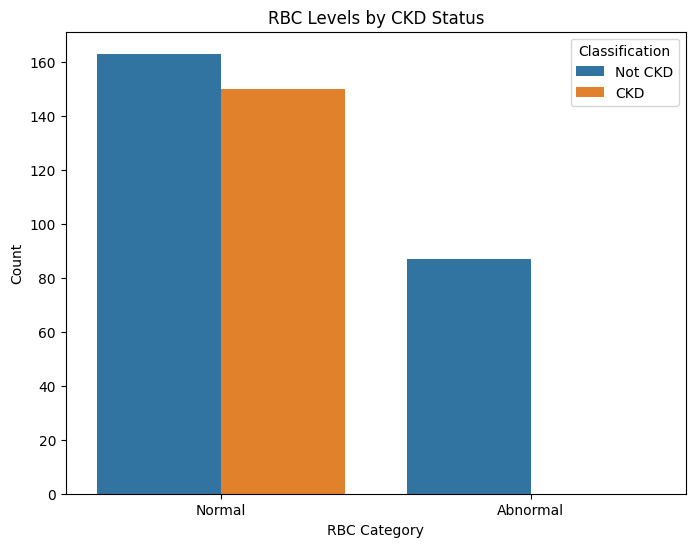


RBC Levels Count by CKD Status:
  RBC_category classification  Count
0     Abnormal            ckd     87
1       Normal            ckd    163
2       Normal         notckd    150


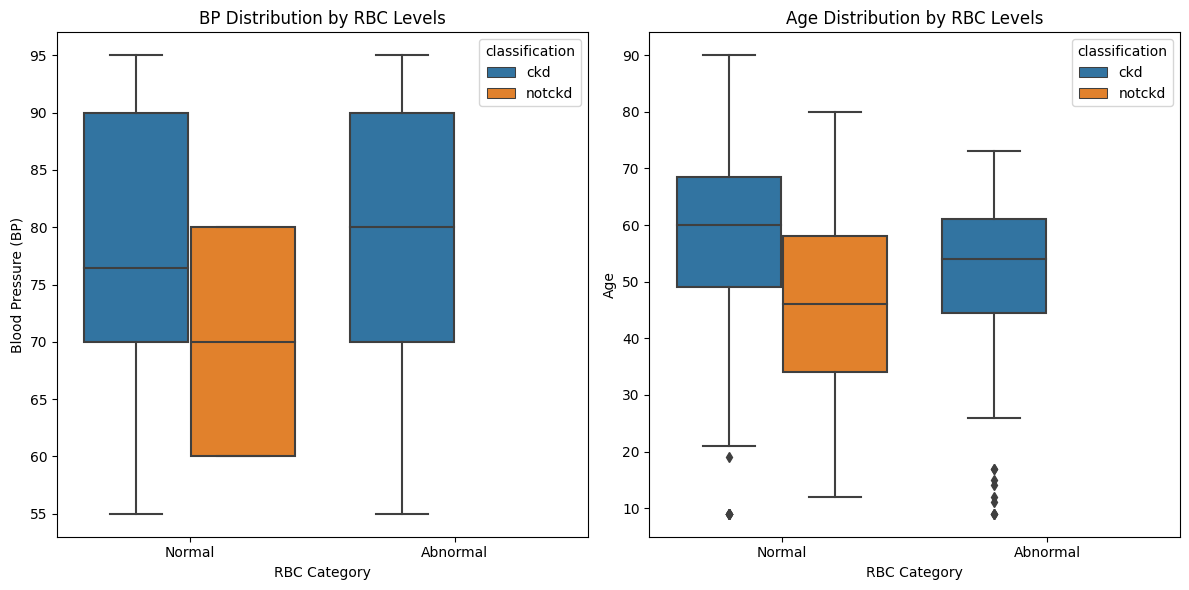

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Convert all RBC values to lowercase (Preprocessing)
df['rbc'] = df['rbc'].astype(str).str.lower()

# 🔹 Categorizing RBC levels
df['RBC_category'] = df['rbc'].apply(lambda x: 'Normal' if x == 'normal' else 'Abnormal')

# 🔹 Count of Normal vs. Abnormal RBC levels
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='RBC_category', hue='classification', palette=['#1f77b4', '#ff7f0e'])
plt.title('RBC Levels by CKD Status')
plt.xlabel('RBC Category')
plt.ylabel('Count')
plt.legend(title='Classification', labels=['Not CKD', 'CKD'])
plt.show()

# 🔹 Grouping by RBC Category and CKD status
rbc_ckd_group = df.groupby(['RBC_category', 'classification']).size().reset_index(name='Count')
print("\nRBC Levels Count by CKD Status:")
print(rbc_ckd_group)

# 🔹 Boxplots for BP & Age (Both Normal & Abnormal RBC levels)
plt.figure(figsize=(12, 6))

# BP Distribution
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='RBC_category', y='bp', hue='classification', palette=['#1f77b4', '#ff7f0e'])
plt.title('BP Distribution by RBC Levels')
plt.xlabel('RBC Category')
plt.ylabel('Blood Pressure (BP)')

# Age Distribution
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='RBC_category', y='age', hue='classification', palette=['#1f77b4', '#ff7f0e'])
plt.title('Age Distribution by RBC Levels')
plt.xlabel('RBC Category')
plt.ylabel('Age')

plt.tight_layout()
plt.show()



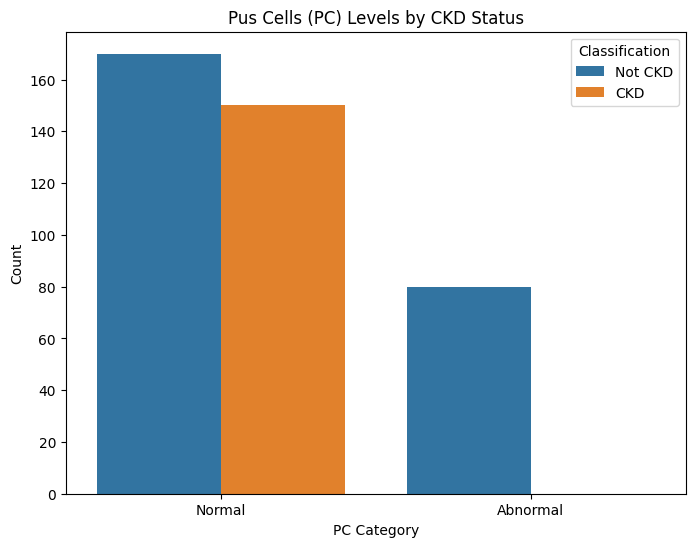


Pus Cells (PC) Levels Count by CKD Status:
  PC_category classification  Count
0    Abnormal            ckd     80
1      Normal            ckd    170
2      Normal         notckd    150


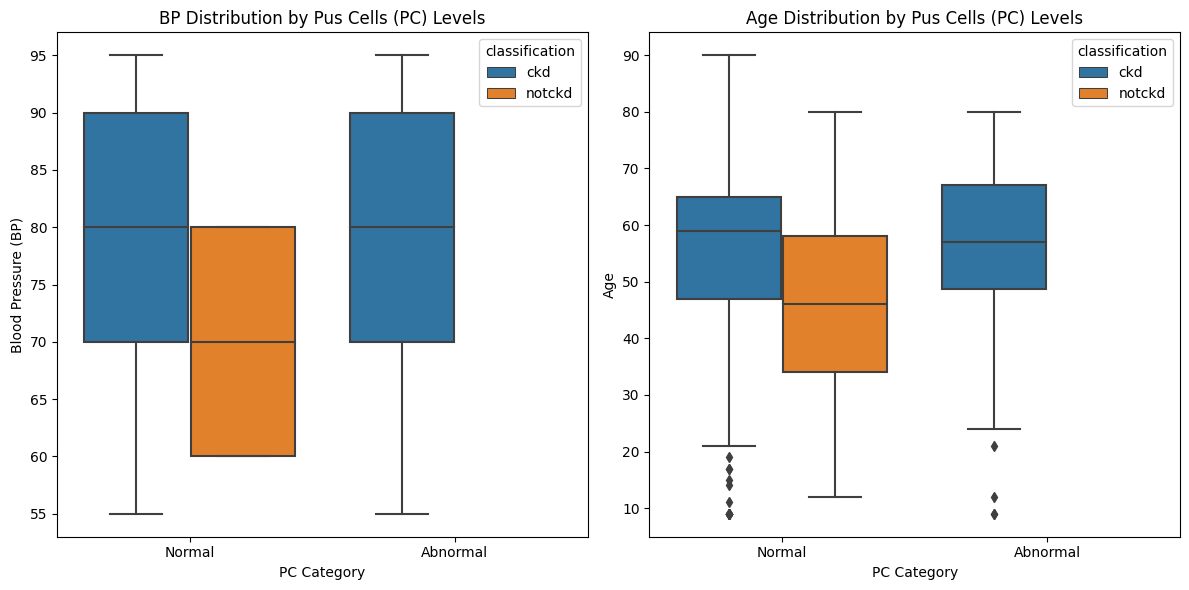

In [31]:

# 🔹 Convert all PC values to lowercase (Preprocessing)
df['pc'] = df['pc'].astype(str).str.lower()

# 🔹 Categorizing PC levels
df['PC_category'] = df['pc'].apply(lambda x: 'Normal' if x == 'normal' else 'Abnormal')

# 🔹 Count of Normal vs. Abnormal PC levels
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='PC_category', hue='classification', palette=['#1f77b4', '#ff7f0e'])
plt.title('Pus Cells (PC) Levels by CKD Status')
plt.xlabel('PC Category')
plt.ylabel('Count')
plt.legend(title='Classification', labels=['Not CKD', 'CKD'])
plt.show()

# 🔹 Grouping by PC Category and CKD status
pc_ckd_group = df.groupby(['PC_category', 'classification']).size().reset_index(name='Count')
print("\nPus Cells (PC) Levels Count by CKD Status:")
print(pc_ckd_group)

# 🔹 Boxplots for BP & Age (Both Normal & Abnormal PC levels)
plt.figure(figsize=(12, 6))

# BP Distribution
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='PC_category', y='bp', hue='classification', palette=['#1f77b4', '#ff7f0e'])
plt.title('BP Distribution by Pus Cells (PC) Levels')
plt.xlabel('PC Category')
plt.ylabel('Blood Pressure (BP)')

# Age Distribution
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='PC_category', y='age', hue='classification', palette=['#1f77b4', '#ff7f0e'])
plt.title('Age Distribution by Pus Cells (PC) Levels')
plt.xlabel('PC Category')
plt.ylabel('Age')

plt.tight_layout()
plt.show()


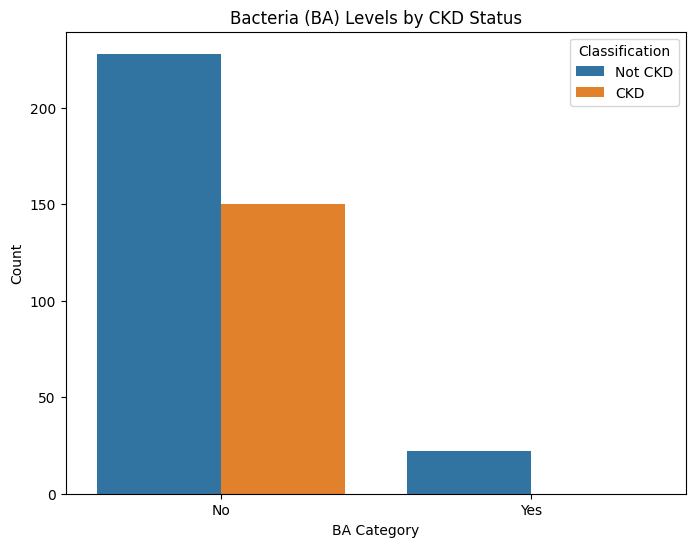


Bacteria (BA) Levels Count by CKD Status:
  BA_category classification  Count
0          No            ckd    228
1          No         notckd    150
2         Yes            ckd     22


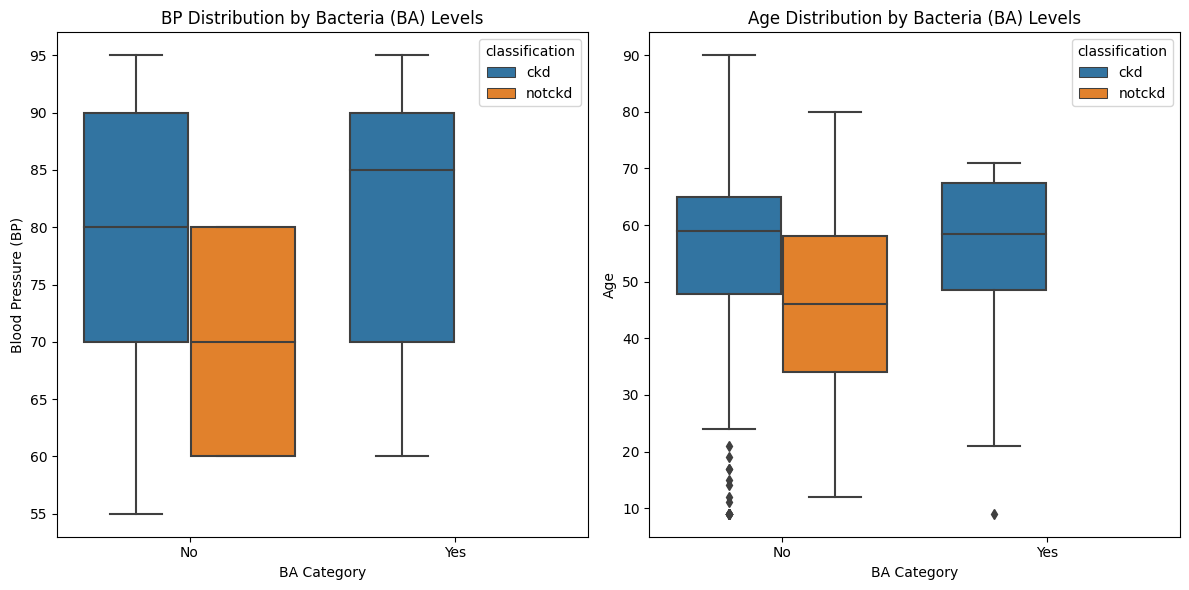

In [32]:

# 🔹 Convert all BA values to lowercase (Preprocessing)
df['ba'] = df['ba'].astype(str).str.lower()

# 🔹 Categorizing BA levels
df['BA_category'] = df['ba'].apply(lambda x: 'Yes' if x == 'present' else 'No')

# 🔹 Count of Normal vs. Abnormal BA levels
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='BA_category', hue='classification', palette=['#1f77b4', '#ff7f0e'])
plt.title('Bacteria (BA) Levels by CKD Status')
plt.xlabel('BA Category')
plt.ylabel('Count')
plt.legend(title='Classification', labels=['Not CKD', 'CKD'])
plt.show()

# 🔹 Grouping by BA Category and CKD status
ba_ckd_group = df.groupby(['BA_category', 'classification']).size().reset_index(name='Count')
print("\nBacteria (BA) Levels Count by CKD Status:")
print(ba_ckd_group)

# 🔹 Boxplots for BP & Age (Both Normal & Abnormal BA levels)
plt.figure(figsize=(12, 6))

# BP Distribution
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='BA_category', y='bp', hue='classification', palette=['#1f77b4', '#ff7f0e'])
plt.title('BP Distribution by Bacteria (BA) Levels')
plt.xlabel('BA Category')
plt.ylabel('Blood Pressure (BP)')

# Age Distribution
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='BA_category', y='age', hue='classification', palette=['#1f77b4', '#ff7f0e'])
plt.title('Age Distribution by Bacteria (BA) Levels')
plt.xlabel('BA Category')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

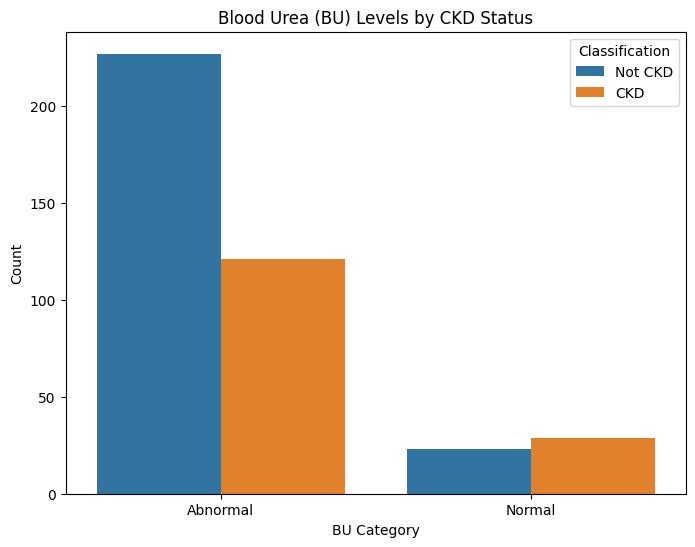


Blood Urea (BU) Levels Count by CKD Status:
  BU_category classification  Count
0    Abnormal            ckd    227
1    Abnormal         notckd    121
2      Normal            ckd     23
3      Normal         notckd     29


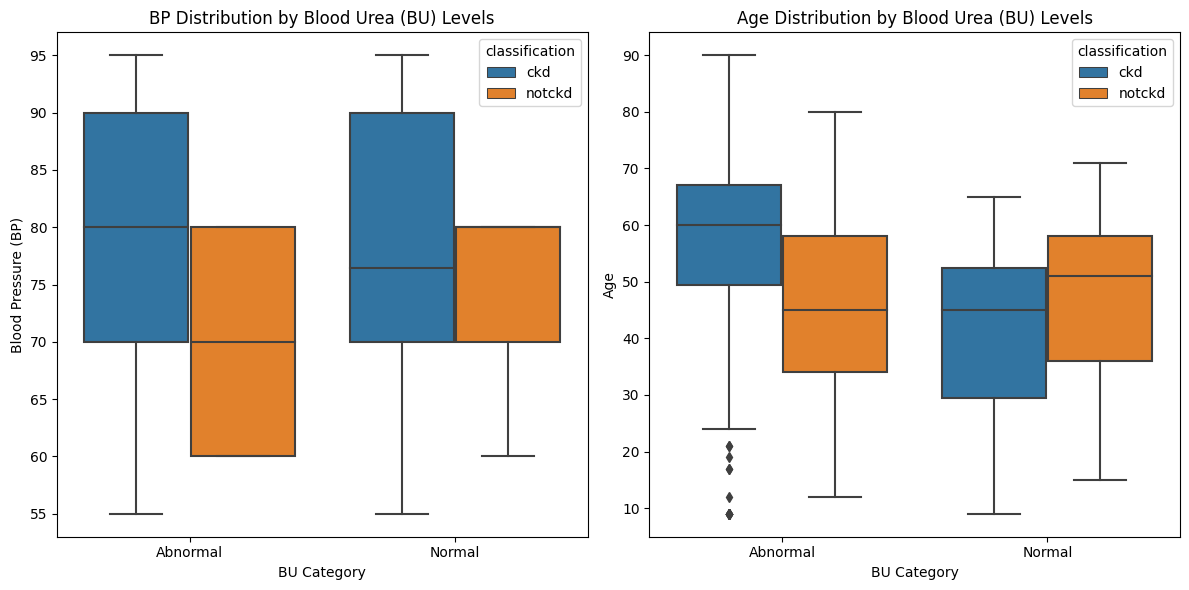

In [33]:

# 🔹 Define BU normal and abnormal conditions
def categorize_bu(value):
    if 7 <= value <= 20:
        return 'Normal'
    else:
        return 'Abnormal'

# 🔹 Categorizing BU levels
df['BU_category'] = df['bu'].apply(categorize_bu)

# 🔹 Count of Normal vs. Abnormal BU levels
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='BU_category', hue='classification', palette=['#1f77b4', '#ff7f0e'])
plt.title('Blood Urea (BU) Levels by CKD Status')
plt.xlabel('BU Category')
plt.ylabel('Count')
plt.legend(title='Classification', labels=['Not CKD', 'CKD'])
plt.show()

# 🔹 Grouping by BU Category and CKD status
bu_ckd_group = df.groupby(['BU_category', 'classification']).size().reset_index(name='Count')
print("\nBlood Urea (BU) Levels Count by CKD Status:")
print(bu_ckd_group)

# 🔹 Boxplots for BP & Age (Both Normal & Abnormal BU levels)
plt.figure(figsize=(12, 6))

# BP Distribution
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='BU_category', y='bp', hue='classification', palette=['#1f77b4', '#ff7f0e'])
plt.title('BP Distribution by Blood Urea (BU) Levels')
plt.xlabel('BU Category')
plt.ylabel('Blood Pressure (BP)')

# Age Distribution
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='BU_category', y='age', hue='classification', palette=['#1f77b4', '#ff7f0e'])
plt.title('Age Distribution by Blood Urea (BU) Levels')
plt.xlabel('BU Category')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


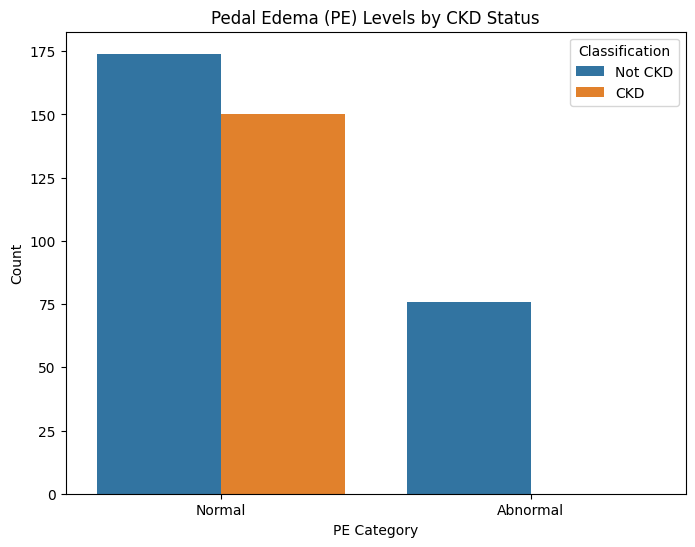

<ipython-input-34-707237aea529>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pe_ckd_group = df.groupby(['PE_category', 'classification']).size().reset_index(name='Count')
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence


Pedal Edema (PE) Levels Count by CKD Status:
  PE_category classification  Count
0      Normal            ckd    174
1      Normal         notckd    150
2    Abnormal            ckd     76
3    Abnormal         notckd      0


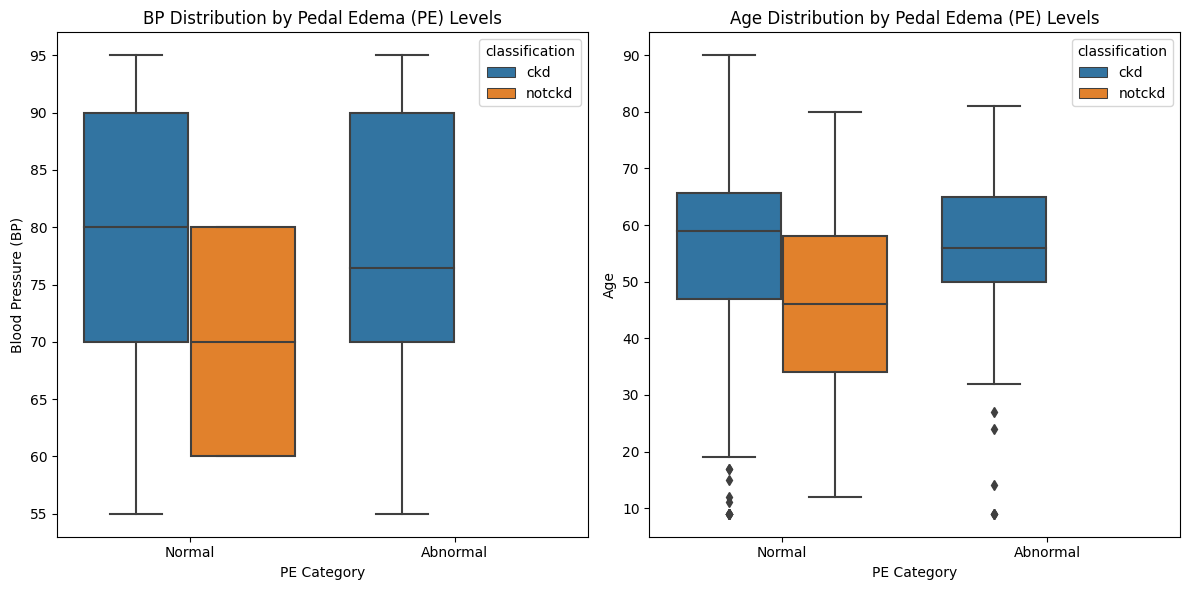

In [34]:
df['PE_category'] = df['pe'].apply(lambda x: 'Normal' if x == 'no' else 'Abnormal')

# 🔹 Count of Normal vs. Abnormal PE levels
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='PE_category', hue='classification', palette=['#1f77b4', '#ff7f0e'])
plt.title('Pedal Edema (PE) Levels by CKD Status')
plt.xlabel('PE Category')
plt.ylabel('Count')
plt.legend(title='Classification', labels=['Not CKD', 'CKD'])
plt.show()

# 🔹 Grouping by PE Category and CKD status
pe_ckd_group = df.groupby(['PE_category', 'classification']).size().reset_index(name='Count')
print("\nPedal Edema (PE) Levels Count by CKD Status:")
print(pe_ckd_group)

# 🔹 Boxplots for BP & Age (Both Normal & Abnormal PE levels)
plt.figure(figsize=(12, 6))

# BP Distribution
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='PE_category', y='bp', hue='classification', palette=['#1f77b4', '#ff7f0e'])
plt.title('BP Distribution by Pedal Edema (PE) Levels')
plt.xlabel('PE Category')
plt.ylabel('Blood Pressure (BP)')

# Age Distribution
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='PE_category', y='age', hue='classification', palette=['#1f77b4', '#ff7f0e'])
plt.title('Age Distribution by Pedal Edema (PE) Levels')
plt.xlabel('PE Category')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

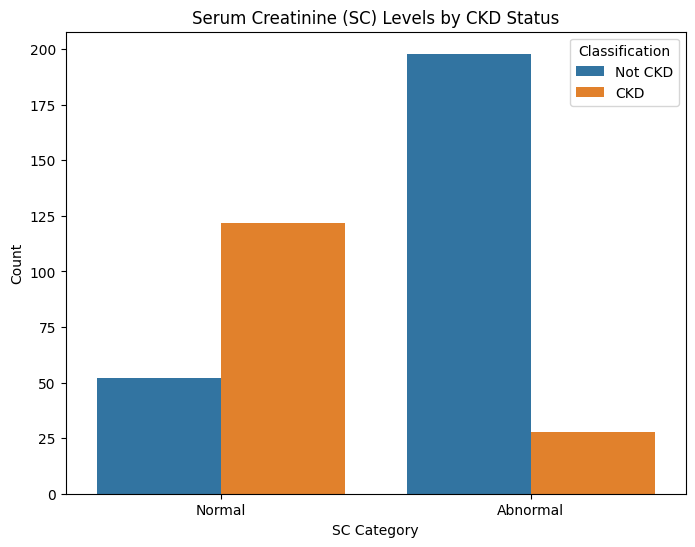


Serum Creatinine (SC) Levels Count by CKD Status:
  SC_category classification  Count
0    Abnormal            ckd    198
1    Abnormal         notckd     28
2      Normal            ckd     52
3      Normal         notckd    122


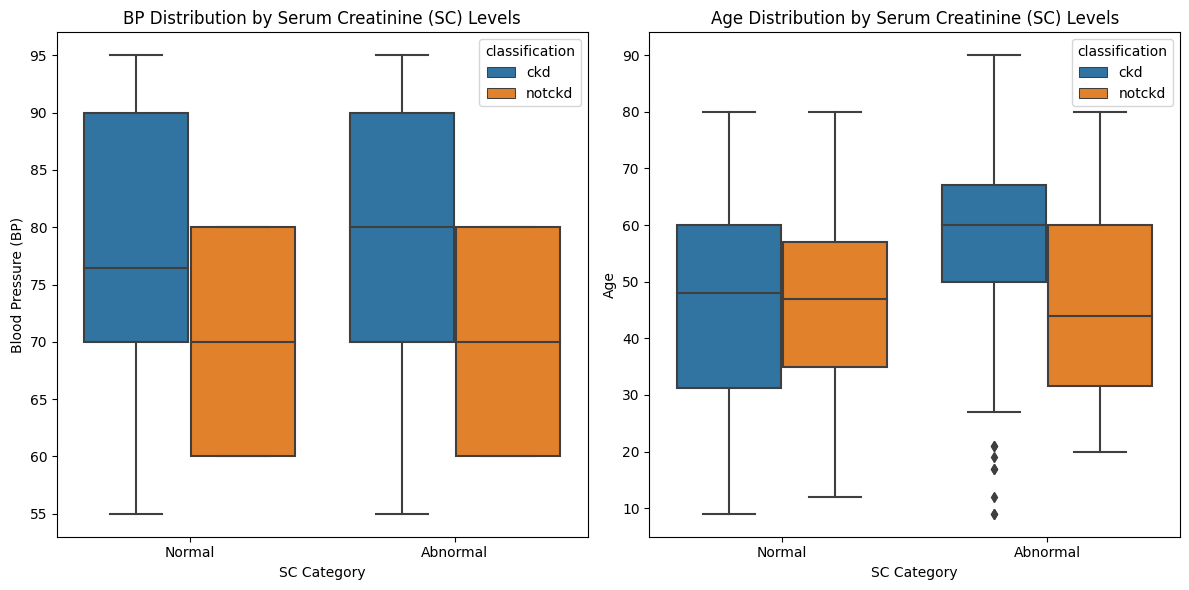

In [35]:


# 🔹 Function to categorize SC levels
def categorize_sc(sc):
    return 'Normal' if 0.6 <= sc <= 1.3 else 'Abnormal'

# 🔹 Apply categorization function
df['SC_category'] = df['sc'].apply(categorize_sc)

# 🔹 Count of Normal vs. Abnormal SC levels
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='SC_category', hue='classification', palette=['#1f77b4', '#ff7f0e'])
plt.title('Serum Creatinine (SC) Levels by CKD Status')
plt.xlabel('SC Category')
plt.ylabel('Count')
plt.legend(title='Classification', labels=['Not CKD', 'CKD'])
plt.show()

# 🔹 Grouping by SC Category and CKD status
sc_ckd_group = df.groupby(['SC_category', 'classification']).size().reset_index(name='Count')
print("\nSerum Creatinine (SC) Levels Count by CKD Status:")
print(sc_ckd_group)

# 🔹 Boxplots for BP & Age (Both Normal & Abnormal SC levels)
plt.figure(figsize=(12, 6))

# BP Distribution
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='SC_category', y='bp', hue='classification', palette=['#1f77b4', '#ff7f0e'])
plt.title('BP Distribution by Serum Creatinine (SC) Levels')
plt.xlabel('SC Category')
plt.ylabel('Blood Pressure (BP)')

# Age Distribution
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='SC_category', y='age', hue='classification', palette=['#1f77b4', '#ff7f0e'])
plt.title('Age Distribution by Serum Creatinine (SC) Levels')
plt.xlabel('SC Category')
plt.ylabel('Age')

plt.tight_layout()
plt.show()


In [36]:
col_drop = ['dm', 'cad' , 'appet'] 
df_cleaned  = df.drop(columns= col_drop)


In [37]:
df_cleaned.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,classification,SG_category,AL_category,SU_category,RBC_category,PC_category,BA_category,BU_category,PE_category,SC_category
0,48.0,80.0,1.0200,1.0,0.000000,normal,normal,notpresent,notpresent,121.000000,...,ckd,Normal,Normal,Normal,Normal,Normal,No,Abnormal,Normal,Normal
1,9.0,55.0,1.0200,4.0,0.000000,abnormal,normal,notpresent,notpresent,148.036517,...,ckd,Normal,Normal,Normal,Abnormal,Normal,No,Normal,Normal,Normal
2,62.0,80.0,1.0100,2.0,1.125356,normal,normal,notpresent,notpresent,223.500000,...,ckd,Normal,Normal,Abnormal,Normal,Normal,No,Abnormal,Normal,Abnormal
3,48.0,70.0,1.0075,4.0,0.000000,normal,abnormal,present,notpresent,117.000000,...,ckd,Normal,Normal,Normal,Normal,Abnormal,No,Abnormal,Abnormal,Abnormal
4,51.0,80.0,1.0100,2.0,0.000000,normal,normal,notpresent,notpresent,106.000000,...,ckd,Normal,Normal,Normal,Normal,Normal,No,Abnormal,Normal,Abnormal


In [38]:
# List of columns to drop
columns_to_drop = ["sg", "al", "su", "rbc", "pc", "bu", "ba", "pe", "sc"]

# Drop the columns
df_cleaned = df_cleaned.drop(columns=columns_to_drop)



In [39]:
# Specify the columns for which missing values should be filled with the mean
columns_to_fill = ['wc', 'rc', 'pcv']  # Replace with actual column names

# Fill missing values only in the selected columns
df[columns_to_fill] = df[columns_to_fill].apply(lambda col: col.fillna(col.mean()))


In [40]:
df_cleaned.head()

,age,bp,pcc,bgr,sod,pot,hemo,pcv,wc,rc,...,classification,SG_category,AL_category,SU_category,RBC_category,PC_category,BA_category,BU_category,PE_category,SC_category
0,48.0,80.0,notpresent,121.000000,137.528754,4.627244,15.4,44.0,7800.0,5.2,...,ckd,Normal,Normal,Normal,Normal,Normal,No,Abnormal,Normal,Normal
1,9.0,55.0,notpresent,148.036517,137.528754,4.627244,11.3,38.0,6000.0,3.8,...,ckd,Normal,Normal,Normal,Abnormal,Normal,No,Normal,Normal,Normal
2,62.0,80.0,notpresent,223.500000,137.528754,4.627244,9.6,31.0,7500.0,4.9,...,ckd,Normal,Normal,Abnormal,Normal,Normal,No,Abnormal,Normal,Abnormal
3,48.0,70.0,present,117.000000,126.000000,2.800000,11.2,32.0,6700.0,3.9,...,ckd,Normal,Normal,Normal,Normal,Abnormal,No,Abnormal,Abnormal,Abnormal
4,51.0,80.0,notpresent,106.000000,137.528754,4.627244,11.6,35.0,7300.0,4.6,...,ckd,Normal,Normal,Normal,Normal,Normal,No,Abnormal,Normal,Abnormal


In [41]:
# Convert 'age' to integer (if it has only whole numbers)
df['age'] = df['age'].astype(int)

# Convert object columns to category
object_cols = ['classification', 'BA_category', 'BU_category', 'SC_category' , 'SG_category','AL_category', 'SU_category','RBC_category','PC_category','htn','ane']
df[object_cols] = df[object_cols].astype('category')




In [42]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
cat_cols = ['classification', 'BA_category', 'BU_category', 'SC_category','PE_category','PC_category','RBC_category','SU_category','AL_category','SG_category','pcc','htn','ane']

# Apply Label Encoding
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for inverse transformation if needed


In [43]:
df_cleaned.head()

,age,bp,pcc,bgr,sod,pot,hemo,pcv,wc,rc,...,classification,SG_category,AL_category,SU_category,RBC_category,PC_category,BA_category,BU_category,PE_category,SC_category
0,48.0,80.0,0,121.000000,137.528754,4.627244,15.4,44.0,7800.0,5.2,...,0,0,0,1,1,1,0,0,1,1
1,9.0,55.0,0,148.036517,137.528754,4.627244,11.3,38.0,6000.0,3.8,...,0,0,0,1,0,1,0,1,1,1
2,62.0,80.0,0,223.500000,137.528754,4.627244,9.6,31.0,7500.0,4.9,...,0,0,0,0,1,1,0,0,1,0
3,48.0,70.0,1,117.000000,126.000000,2.800000,11.2,32.0,6700.0,3.9,...,0,0,0,1,1,0,0,0,0,0
4,51.0,80.0,0,106.000000,137.528754,4.627244,11.6,35.0,7300.0,4.6,...,0,0,0,1,1,1,0,0,1,0


In [44]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to standardize
numerical_cols = ['age', 'bp', 'bgr', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization (fit and transform)
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

# Print first few rows to verify changes
print(df_cleaned[numerical_cols].head())


        age        bp       bgr       sod       pot      hemo       pcv  \
0 -0.212673  0.391532 -0.347722 -0.111144  0.302593  1.064621  0.648010   
1 -2.544153 -1.894959  0.240394 -0.111144  0.302593 -0.457824 -0.069537   
2  0.624269  0.391532  1.881924 -0.111144  0.302593 -1.089082 -0.906675   
3 -0.212673 -0.523064 -0.434732 -2.296809 -2.540136 -0.494957 -0.787084   
4 -0.033328  0.391532 -0.674012 -0.111144  0.302593 -0.346426 -0.428310   

         wc        rc  
0 -0.223225  0.700535  
1 -0.940540 -0.759882  
2 -0.342777  0.387588  
3 -0.661584 -0.655567  
4 -0.422479  0.074642  


In [45]:
df_cleaned.head()

,age,bp,pcc,bgr,sod,pot,hemo,pcv,wc,rc,...,classification,SG_category,AL_category,SU_category,RBC_category,PC_category,BA_category,BU_category,PE_category,SC_category
0,-0.212673,0.391532,0,-0.347722,-0.111144,0.302593,1.064621,0.648010,-0.223225,0.700535,...,0,0,0,1,1,1,0,0,1,1
1,-2.544153,-1.894959,0,0.240394,-0.111144,0.302593,-0.457824,-0.069537,-0.940540,-0.759882,...,0,0,0,1,0,1,0,1,1,1
2,0.624269,0.391532,0,1.881924,-0.111144,0.302593,-1.089082,-0.906675,-0.342777,0.387588,...,0,0,0,0,1,1,0,0,1,0
3,-0.212673,-0.523064,1,-0.434732,-2.296809,-2.540136,-0.494957,-0.787084,-0.661584,-0.655567,...,0,0,0,1,1,0,0,0,0,0
4,-0.033328,0.391532,0,-0.674012,-0.111144,0.302593,-0.346426,-0.428310,-0.422479,0.074642,...,0,0,0,1,1,1,0,0,1,0


In [46]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   pcc             400 non-null    int64  
 3   bgr             400 non-null    float64
 4   sod             400 non-null    float64
 5   pot             400 non-null    float64
 6   hemo            400 non-null    float64
 7   pcv             399 non-null    float64
 8   wc              399 non-null    float64
 9   rc              399 non-null    float64
 10  htn             400 non-null    int64  
 11  ane             400 non-null    int64  
 12  classification  400 non-null    int64  
 13  SG_category     400 non-null    int64  
 14  AL_category     400 non-null    int64  
 15  SU_category     400 non-null    int64  
 16  RBC_category    400 non-null    int64  
 17  PC_category     400 non-null    int

In [47]:
import pandas as pd

# Convert 'pcv', 'wc', 'rc' to numeric in case they are stored as strings
df_cleaned[['pcv', 'wc', 'rc']] = df_cleaned[['pcv', 'wc', 'rc']].apply(pd.to_numeric, errors='coerce')

# Fill missing values with the median of each column
df_cleaned[['pcv', 'wc', 'rc']] = df_cleaned[['pcv', 'wc', 'rc']].fillna(df[['pcv', 'wc', 'rc']].median())

# Verify if missing values are filled
print(df.isnull().sum())


age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
SG_category       0
AL_category       0
SU_category       0
RBC_category      0
PC_category       0
BA_category       0
BU_category       0
PE_category       0
SC_category       0
dtype: int64


In [50]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   pcc             400 non-null    int64  
 3   bgr             400 non-null    float64
 4   sod             400 non-null    float64
 5   pot             400 non-null    float64
 6   hemo            400 non-null    float64
 7   pcv             400 non-null    float64
 8   wc              400 non-null    float64
 9   rc              400 non-null    float64
 10  htn             400 non-null    int64  
 11  ane             400 non-null    int64  
 12  classification  400 non-null    int64  
 13  SG_category     400 non-null    int64  
 14  AL_category     400 non-null    int64  
 15  SU_category     400 non-null    int64  
 16  RBC_category    400 non-null    int64  
 17  PC_category     400 non-null    int

In [49]:

df_cleaned.to_csv('clean_data.csv', index=False)

# This will save the cleaned data to 'cleaned_data.csv' in your current working directory
